In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy import stats
from sklearn.utils import resample


# Visualization

In [37]:
# Iris 데이터셋 로딩
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [38]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


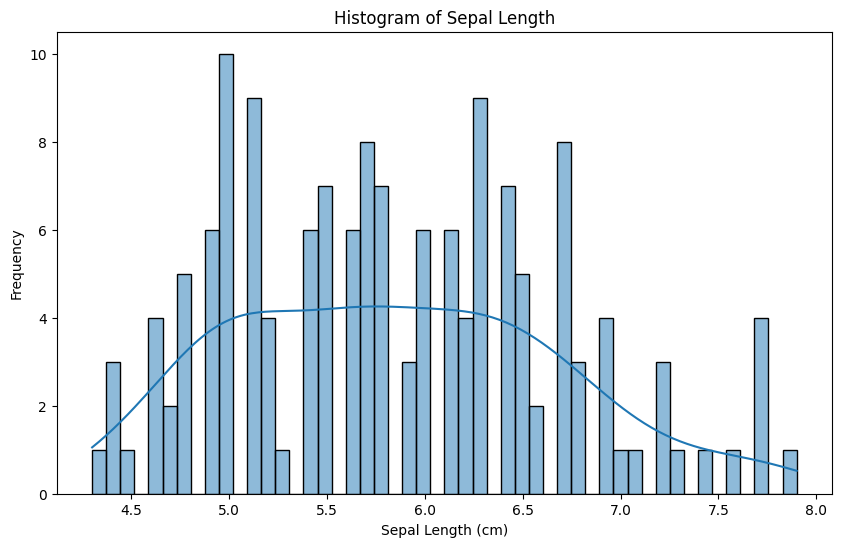

In [9]:

# Sepal Length에 대한 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df_iris['sepal length (cm)'], bins=50, kde=True)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

In [10]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


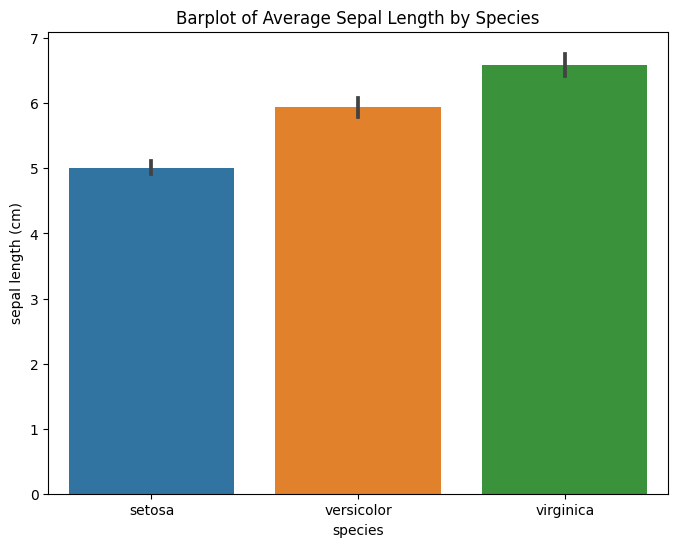

In [11]:

# 막대 그래프 (barplot은 카테고리 데이터의 평균과 95% 신뢰 구간을 표시합니다)
plt.figure(figsize=(8, 6))

sns.barplot(data=df_iris, x='species', y='sepal length (cm)')
plt.title('Barplot of Average Sepal Length by Species')
plt.show()


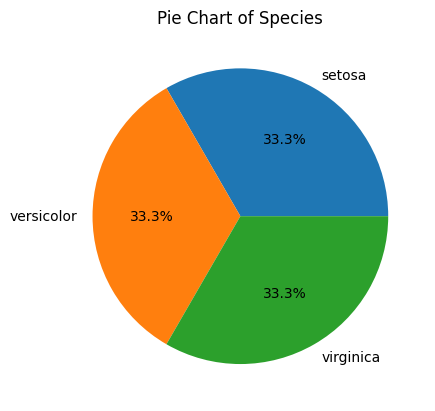

In [12]:
# 파이 차트 (Seaborn은 기본적으로 파이 차트를 지원하지 않으므로 matplotlib을 사용해야 함)
species_counts = df_iris['species'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Species')
plt.show()

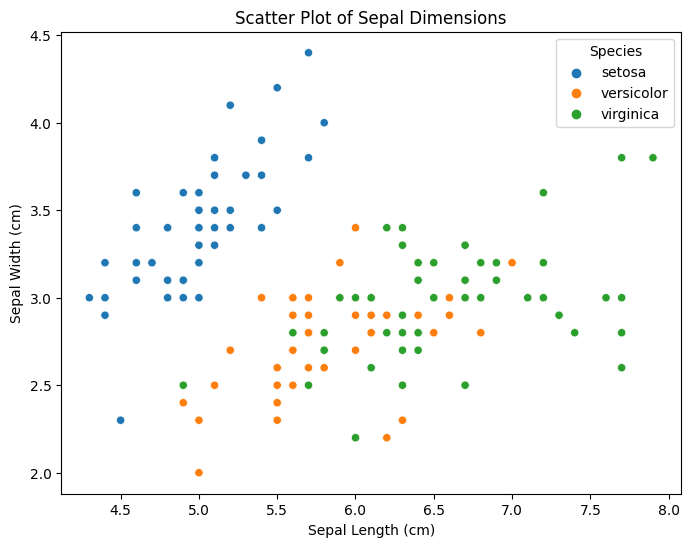

In [5]:
# Sepal Length와 Sepal Width에 대한 Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df_iris)
plt.title('Scatter Plot of Sepal Dimensions')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

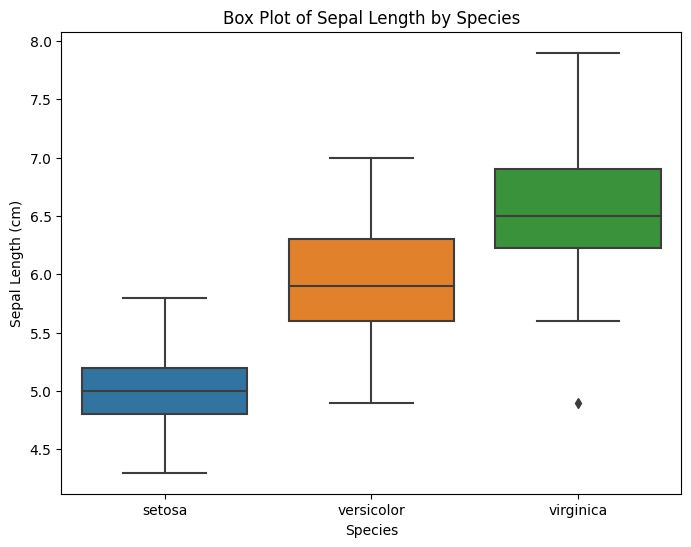

In [6]:
# Sepal Length에 대한 Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df_iris)
plt.title('Box Plot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

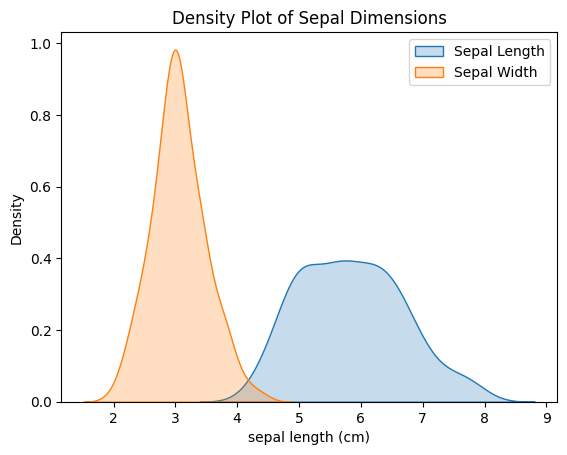

In [14]:
sns.kdeplot(data=df_iris['sepal length (cm)'], label='Sepal Length', shade=True)
sns.kdeplot(data=df_iris['sepal width (cm)'], label='Sepal Width', shade=True)
plt.title('Density Plot of Sepal Dimensions')
plt.legend()
plt.show()

# Statistics

In [18]:
description = df_iris.describe()
description

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
median = df_iris.median()
print(median)

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


/home/user/miniconda3/envs/trade/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [25]:
trimmed_mean = {}
for col in df_iris.columns[:-1]: # 마지막 열(species)는 수치형 데이터가 아니므로 제외합니다.
    trimmed_mean[col] = stats.trim_mean(df_iris[col], 0.1) # 양쪽 끝에서 10%씩 자른 절단 평균
print(trimmed_mean)

{'sepal length (cm)': 5.8083333333333345, 'sepal width (cm)': 3.0433333333333334, 'petal length (cm)': 3.7600000000000002, 'petal width (cm)': 1.1841666666666668}


In [27]:
percentiles = df_iris.quantile([0.25, 0.5, 0.75]) 
print(percentiles)

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8


# Sampling

95% Confidence Interval: (5.563249999999999, 6.126666666666666)


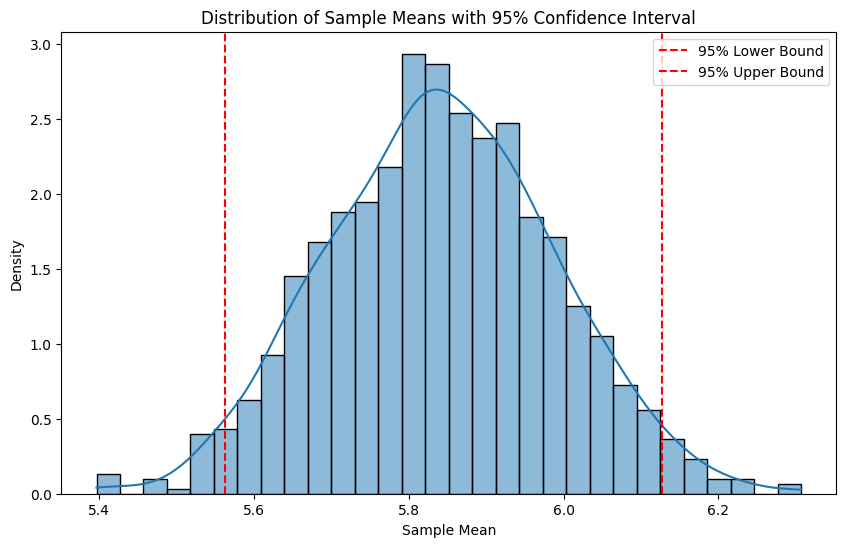

In [33]:
# 표본 평균을 저장할 리스트 초기화
sample_means = []

# 표본의 크기
sample_size = 30

# 표본의 수
n_samples = 1000


# 특정 컬럼 선택, 예를 들어 'sepal_length'
column = 'sepal length (cm)'

# 여러 표본을 추출하고 각 표본의 평균 계산
for _ in range(n_samples):
    # 표본 추출
    sample = df_iris[column].sample(n=sample_size, replace=True)
    # 표본 평균 계산
    sample_means.append(sample.mean())

    
# 신뢰 수준 설정 (95%)
confidence_level = 0.95

# 신뢰 구간 계산 (표본 평균의 분포에서)
lower_p = (1 - confidence_level) / 2
upper_p = 1 - lower_p
lower_bound = np.percentile(sample_means, lower_p * 100)
upper_bound = np.percentile(sample_means, upper_p * 100)

# 결과 출력
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

# 히스토그램 및 신뢰 구간 그리기
plt.figure(figsize=(10,6))
sns.histplot(sample_means, kde=True, bins=30, stat="density")
plt.title('Distribution of Sample Means with 95% Confidence Interval')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='95% Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='95% Upper Bound')
plt.legend()
plt.show()

# Statistical test

In [39]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
# 데이터 불러오기
setosa = df_iris[df_iris['species'] == 'setosa']['sepal length (cm)']
virginica = df_iris[df_iris['species'] == 'virginica']['sepal length (cm)']

# 원래의 평균 차이 계산
obs_diff = np.mean(setosa) - np.mean(virginica)

# 순열 검정
n_permutations = 10000
count = 0
combined = np.concatenate((setosa, virginica))

permuted_diffs = []
for _ in range(n_permutations):
    permuted_data = np.random.permutation(combined)
    permuted_setosa = permuted_data[:len(setosa)]
    permuted_virginica = permuted_data[len(setosa):]

    permuted_diff = np.mean(permuted_setosa) - np.mean(permuted_virginica)
    permuted_diffs.append(permuted_diff)

    if permuted_diff > obs_diff:
        count += 1

p_value = count / n_permutations



Observed difference: -1.581999999999998
P-value: 1.0


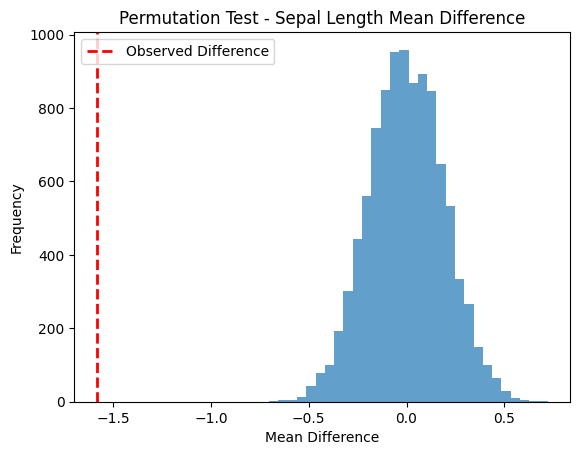

95% Confidence Interval: [-0.36600000000000055, 0.37399999999999967]


In [43]:

# 결과 출력
print(f"Observed difference: {obs_diff}")
print(f"P-value: {p_value}")

# 히스토그램 그리기
plt.hist(permuted_diffs, bins=30, alpha=0.7)
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test - Sepal Length Mean Difference')
plt.legend()
plt.show()

# 95% 신뢰구간
confidence_level = 0.95
lower_p = (1 - confidence_level) / 2
upper_p = 1 - lower_p
lower_bound = np.percentile(permuted_diffs, lower_p * 100)
upper_bound = np.percentile(permuted_diffs, upper_p * 100)

print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")